In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
fdr.__version__

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 6]
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_junkbond = pd.read_csv('junkbond_rate.csv')
df_10y = pd.read_csv('usa_10y_rate.csv')
df_1y = pd.read_csv('usa_1y_rate.csv')
df_ex = fdr.DataReader('USD/KRW', '2021-04-09')

In [4]:
df_kospi = fdr.DataReader('KS11', '2021-04-09')
df_kospi = df_kospi[['Close']]
df_kospi.columns = ['kospi_close']
df_kospi = df_kospi[df_kospi.index < '2024-04-10']
df_kospi.head()

,kospi_close
Date,
2021-04-09,3131.88
2021-04-12,3135.59
2021-04-13,3169.08
2021-04-14,3182.38
2021-04-15,3194.33


In [19]:
df_hsi = fdr.DataReader('HSI', '2021-04-09')
df_hsi = df_hsi[['Close']]
df_hsi.columns = ['hsi_close']
df_hsi = df_hsi[df_hsi.index < '2024-04-10']
df_hsi.head()

,hsi_close
Date,
2021-04-09,28698.800781
2021-04-12,28453.279297
2021-04-13,28497.250000
2021-04-14,28900.830078
2021-04-15,28793.140625


In [24]:
df_ssec = fdr.DataReader('SSEC', '2021-04-09')
df_ssec = df_ssec[['Close']]
df_ssec.columns = ['ssec_close']
df_ssec = df_ssec[df_ssec.index < '2024-04-10']
df_ssec.head()

,ssec_close
Date,
2021-04-09,3450.679932
2021-04-12,3412.949951
2021-04-13,3396.469971
2021-04-14,3416.719971
2021-04-15,3398.989990


In [5]:
df_10y.columns = ['DATE', '종가10y', '시가10y', '고가10y', '저가10y', '변동%10y']
df_1y.columns = ['DATE', '종가1y', '시가1y', '고가1y', '저가1y', '변동%1y']

In [6]:
df_junkbond['DATE'] = pd.to_datetime(df_junkbond['DATE'])
df_10y['DATE'] = pd.to_datetime(df_10y['DATE'])
df_1y['DATE'] = pd.to_datetime(df_1y['DATE'])

In [7]:
df_junkbond = df_junkbond[df_junkbond['BAMLH0A1HYBB'] != '.']
df_junkbond['BAMLH0A1HYBB'] =df_junkbond['BAMLH0A1HYBB'].astype(float)

df_junkbond.set_index('DATE', inplace=True)
df_10y.set_index('DATE', inplace=True)
df_1y.set_index('DATE', inplace=True)


In [25]:
df_data = df_junkbond.join(df_1y).join(df_10y).join(df_ex).join(df_kospi).join(df_hsi).join(df_ssec)
df_data['종가diff'] = df_data['종가10y'] - df_data['종가1y']
df_data.head()

,BAMLH0A1HYBB,종가1y,시가1y,고가1y,저가1y,변동%1y,종가10y,시가10y,고가10y,저가10y,...,Open,High,Low,Close,Adj Close,Volume,kospi_close,hsi_close,ssec_close,종가diff
DATE,,,,,,,,,,,,,,,,,,,,,
2021-04-09,2.34,0.058,0.063,0.066,0.056,3.57%,1.662,1.633,1.687,1.621,...,1115.660034,1121.729980,1112.959961,1115.839966,1115.839966,0.0,3131.88,28698.800781,3450.679932,1.604
2021-04-12,2.33,0.066,0.066,0.068,0.061,13.79%,1.669,1.674,1.685,1.644,...,1122.020020,1126.699951,1120.250000,1122.060059,1122.060059,0.0,3135.59,28453.279297,3412.949951,1.603
2021-04-13,2.40,0.061,0.068,0.073,0.061,-7.58%,1.620,1.676,1.703,1.616,...,1124.449951,1127.859985,1120.170044,1124.449951,1124.449951,0.0,3169.08,28497.250000,3396.469971,1.559
2021-04-14,2.34,0.061,0.068,0.071,0.061,0.00%,1.634,1.615,1.650,1.611,...,1120.719971,1123.430054,1111.579956,1120.689941,1120.689941,0.0,3182.38,28900.830078,3416.719971,1.573
2021-04-15,2.35,0.063,0.068,0.073,0.061,3.28%,1.574,1.641,1.646,1.528,...,1116.109985,1119.040039,1112.469971,1116.109985,1116.109985,0.0,3194.33,28793.140625,3398.989990,1.511


In [27]:
df_data[['BAMLH0A1HYBB', 'Close', 'kospi_close', '종가diff', 'hsi_close', 'ssec_close']].corr()

,BAMLH0A1HYBB,Close,kospi_close,종가diff,hsi_close,ssec_close
BAMLH0A1HYBB,1.000000,0.486536,-0.656754,-0.311059,-0.276616,-0.205481
Close,0.486536,1.000000,-0.887368,-0.790651,-0.923784,-0.789408
kospi_close,-0.656754,-0.887368,1.000000,0.776576,0.836078,0.728989
종가diff,-0.311059,-0.790651,0.776576,1.000000,0.805279,0.691872
hsi_close,-0.276616,-0.923784,0.836078,0.805279,1.000000,0.886555
ssec_close,-0.205481,-0.789408,0.728989,0.691872,0.886555,1.000000


#### 미 정크본드 가산금리 vs 환율

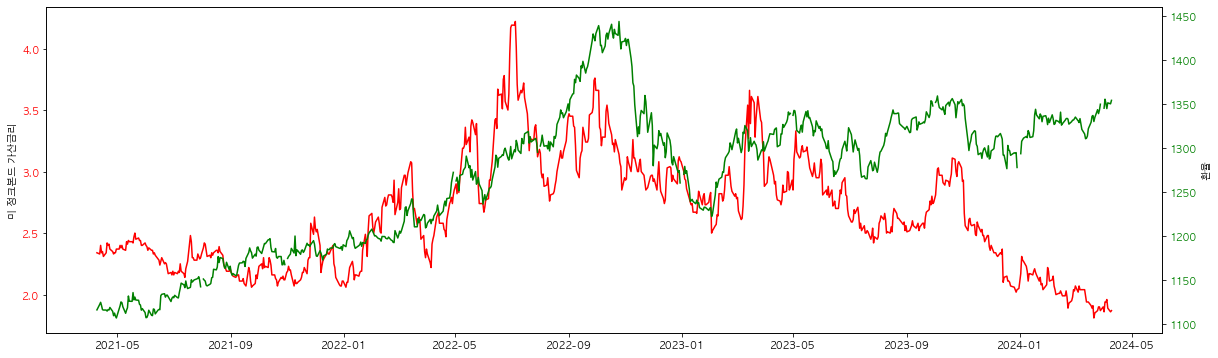

In [10]:

fig, ax = plt.subplots()
ax.plot(df_data.BAMLH0A1HYBB, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('미 정크본드 가산금리')

ax2 = ax.twinx()

ax2.plot(df_data.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 미 10년채권 - 1년채권 금리 vs 환율

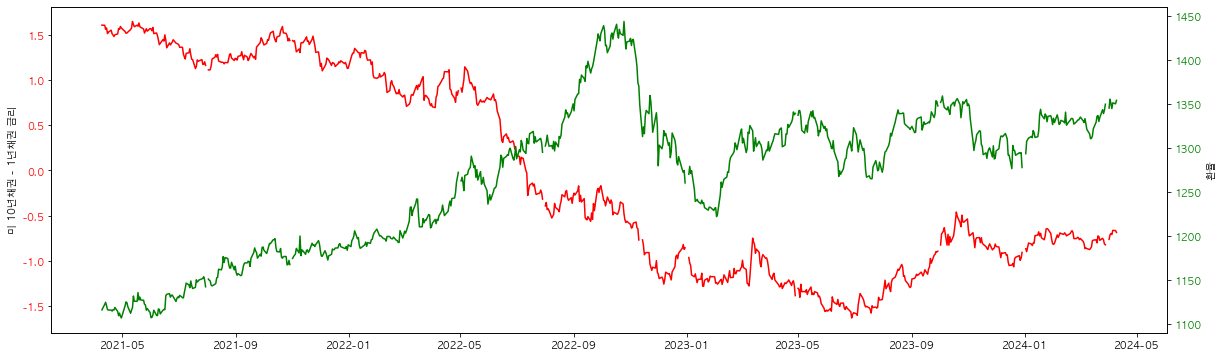

In [13]:

fig, ax = plt.subplots()
ax.plot(df_data.종가diff, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('미 10년채권 - 1년채권 금리')

ax2 = ax.twinx()

ax2.plot(df_data.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 코스피 주가 vs 환율

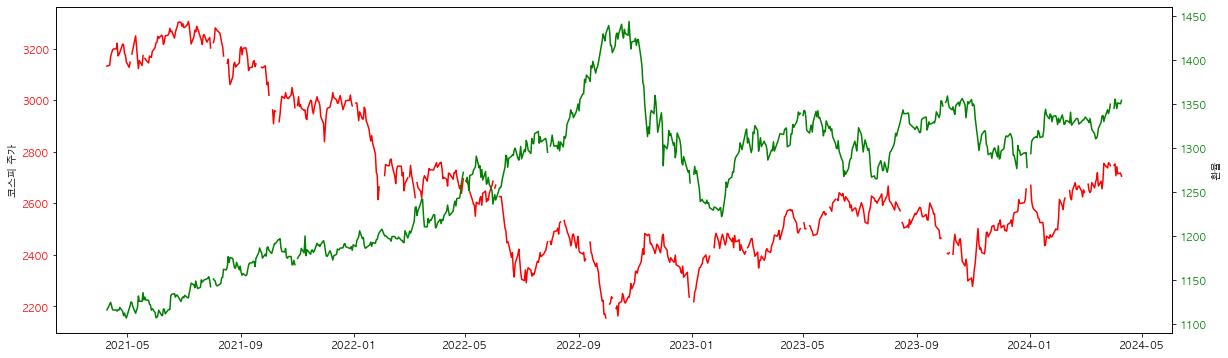

In [14]:
fig, ax = plt.subplots()
ax.plot(df_data.kospi_close, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('코스피 주가')

ax2 = ax.twinx()

ax2.plot(df_data.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 항생지수 vs 환율

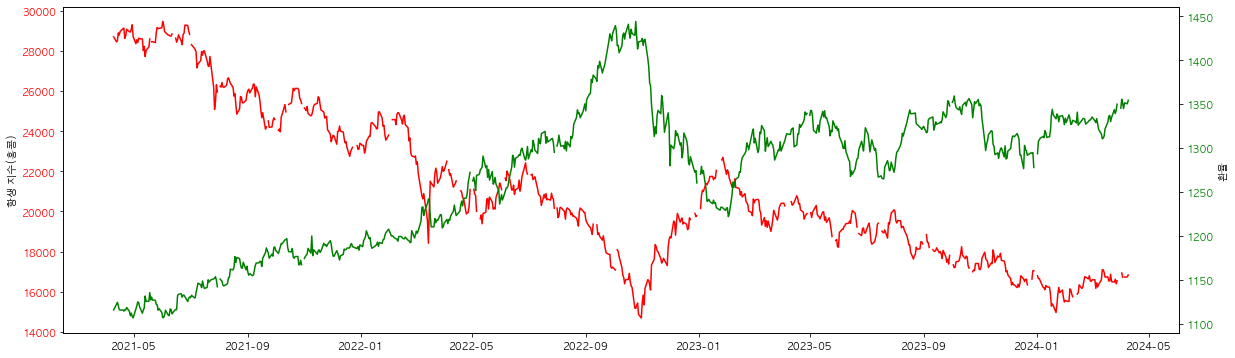

In [23]:
fig, ax = plt.subplots()
ax.plot(df_data.hsi_close, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('항생 지수(홍콩)')

ax2 = ax.twinx()

ax2.plot(df_data.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 상해지수 vs 환율

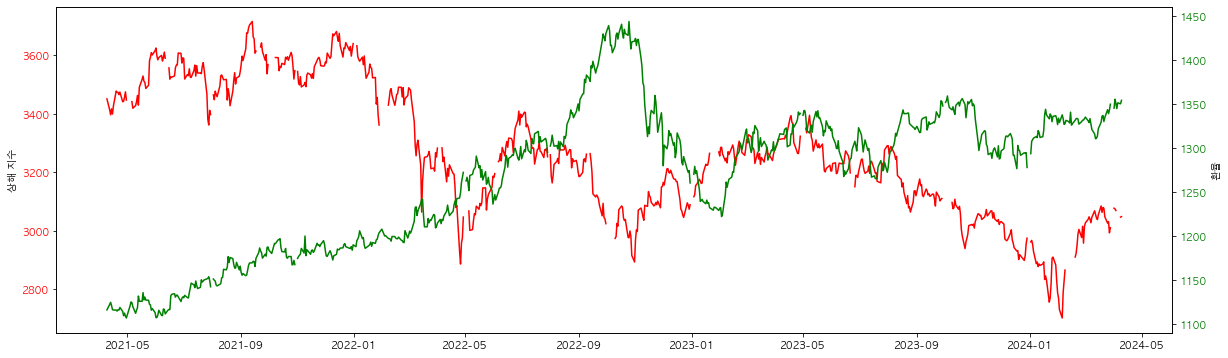

In [26]:
fig, ax = plt.subplots()
ax.plot(df_data.ssec_close, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('상해 지수')

ax2 = ax.twinx()

ax2.plot(df_data.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

---

#### 미기업재고 크롤링

In [276]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager

In [277]:
def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    # driver = webdriver.Chrome('/usr/local/bin/chromedriver')
    return driver



def get_driver(url):
    driver = set_chrome_driver()
    driver.get(url)
    return driver

In [278]:
driver = get_driver('https://kr.investing.com/economic-calendar/business-inventories-29')

soup = BeautifulSoup(driver.page_source, 'html.parser')
for i in range(10):
    driver.find_element(By.ID, 'showMoreHistory29').click()
    time.sleep(1)


In [279]:
content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find(id='eventHistoryTable29').find('tbody').find_all('tr')

list_dt, list_real, list_pred, list_prev = [], [], [], []
for idx in range(len(containers)):
    list_dt.append(containers[idx]['event_timestamp'])
    list_tmp = [ float(td.text.replace('\xa0', '-100').replace('%', ''))  for td in containers[idx].find_all('td', {'class':'noWrap'})  ]
    list_real.append(list_tmp[0])
    list_pred.append(list_tmp[1])
    list_prev.append(list_tmp[2])
    
df_inventory = pd.DataFrame()
df_inventory['Date'] = list_dt
df_inventory['실제'] = list_real
df_inventory['예측'] = list_pred
df_inventory['이전'] = list_prev

df_inventory = df_inventory[df_inventory['실제'] != -100.0]
df_inventory['미기업재고diff'] = df_inventory['실제'] - df_inventory['예측'] # 실제가 예측보다 높으면 미달러화 가치와 전망이 부정적
df_inventory 

,Date,실제,예측,이전,미기업재고diff
1,2024-03-14 14:00:00,0.0,0.2,0.3,-0.2
2,2024-02-15 15:00:00,0.4,0.4,-0.1,0.0
3,2024-01-17 15:00:00,-0.1,-0.1,-0.1,0.0
4,2023-12-14 15:00:00,-0.1,0.0,0.2,-0.1
5,2023-11-15 15:00:00,0.4,0.4,0.4,0.0
...,...,...,...,...,...
61,2019-04-01 14:00:00,0.8,0.5,0.8,0.3
62,2019-03-11 14:00:00,0.6,0.6,-0.1,0.0
63,2019-02-14 15:00:00,-0.1,0.3,0.6,-0.4
64,2018-12-14 15:00:00,0.6,0.6,0.5,0.0


In [280]:
df_inventory['Date'] = pd.to_datetime(df_inventory['Date']).dt.strftime('%Y-%m-%d')
df_inventory['Date'] = pd.to_datetime(df_inventory['Date'])
df_inventory.set_index('Date', inplace=True)
df_inventory.head()

,실제,예측,이전,미기업재고diff
Date,,,,
2024-03-14,0.0,0.2,0.3,-0.2
2024-02-15,0.4,0.4,-0.1,0.0
2024-01-17,-0.1,-0.1,-0.1,0.0
2023-12-14,-0.1,0.0,0.2,-0.1
2023-11-15,0.4,0.4,0.4,0.0


In [281]:
df_comp = df_inventory.join(df_ex)
df_comp = df_comp[df_comp.index > '2021-04-08']

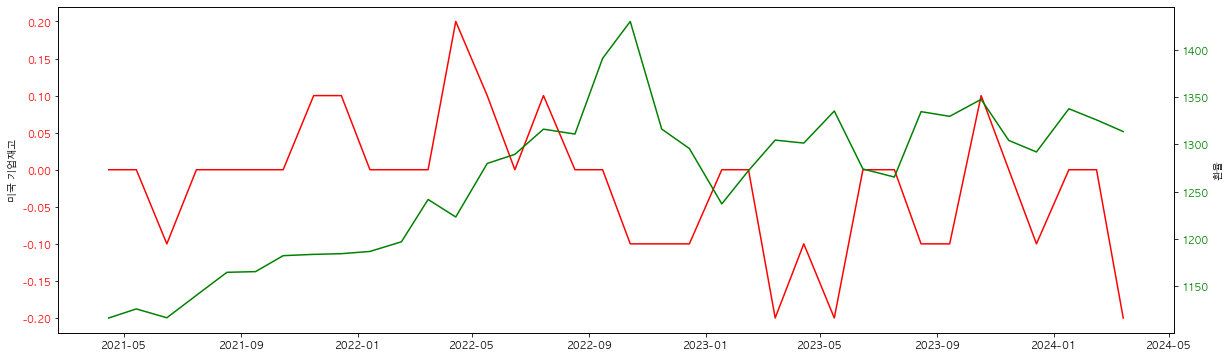

In [282]:
fig, ax = plt.subplots()
ax.plot(df_comp.미기업재고diff, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('미국 기업재고')

ax2 = ax.twinx()

ax2.plot(df_comp.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 미 신규 실업수당청구건수(X)

In [248]:
driver = get_driver('https://kr.investing.com/economic-calendar/initial-jobless-claims-294')

soup = BeautifulSoup(driver.page_source, 'html.parser')
for i in range(30):
    el = driver.find_element(By.ID, 'showMoreHistory294')
    actions = ActionChains(driver).move_to_element(el)
    actions.perform()
    el.click()
    time.sleep(1)

In [253]:
content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find(id='eventHistoryTable294').find('tbody').find_all('tr')

list_dt, list_real, list_pred, list_prev = [], [], [], []
for idx in range(len(containers)):
    list_dt.append(containers[idx]['event_timestamp'])
    list_tmp = [ float(td.text.replace('\xa0', '-1000').replace('K', ''))  for td in containers[idx].find_all('td', {'class':'noWrap'})  ]
    list_real.append(list_tmp[0])
    list_pred.append(list_tmp[1])
    list_prev.append(list_tmp[2])
    
df_jobless = pd.DataFrame()
df_jobless['Date'] = list_dt
df_jobless['실제'] = list_real
df_jobless['예측'] = list_pred
df_jobless['이전'] = list_prev

df_jobless = df_jobless[df_jobless['실제'] != -1000.0]
df_jobless['미실업수당diff'] = df_jobless['예측'] - df_jobless['실제'] # 실제가 예측보다 높으면 미달러화 가치와 전망이 부정적
df_jobless 

,Date,실제,예측,이전,미실업수당diff
1,2024-04-11 12:30:00,211.0,216.0,222.0,5.0
2,2024-04-04 12:30:00,221.0,213.0,212.0,-8.0
3,2024-03-28 12:30:00,210.0,212.0,212.0,2.0
4,2024-03-21 12:30:00,210.0,212.0,212.0,2.0
5,2024-03-14 12:30:00,209.0,218.0,210.0,9.0
...,...,...,...,...,...
181,2020-10-29 12:30:00,751.0,775.0,791.0,24.0
182,2020-10-22 12:30:00,787.0,860.0,842.0,73.0
183,2020-10-15 12:30:00,898.0,825.0,845.0,-73.0
184,2020-10-08 12:30:00,840.0,820.0,849.0,-20.0


In [254]:
df_jobless['Date'] = pd.to_datetime(df_jobless['Date']).dt.strftime('%Y-%m-%d')
df_jobless['Date'] = pd.to_datetime(df_jobless['Date'])
df_jobless.set_index('Date', inplace=True)
df_jobless.head()

,실제,예측,이전,미실업수당diff
Date,,,,
2024-04-11,211.0,216.0,222.0,5.0
2024-04-04,221.0,213.0,212.0,-8.0
2024-03-28,210.0,212.0,212.0,2.0
2024-03-21,210.0,212.0,212.0,2.0
2024-03-14,209.0,218.0,210.0,9.0


In [255]:
df_comp = df_jobless.join(df_ex)
df_comp = df_comp[df_comp.index > '2021-04-08']

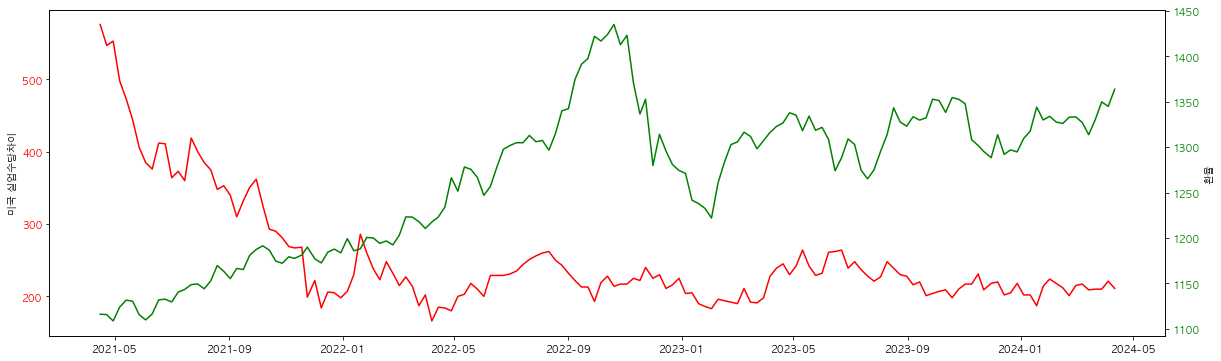

In [257]:
fig, ax = plt.subplots()
ax.plot(df_comp.실제, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('미국 실업수당차이')

ax2 = ax.twinx()

ax2.plot(df_comp.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

#### 미국 소비자물가지수(CPI) 전년대비(X)

In [268]:
driver = get_driver('https://kr.investing.com/economic-calendar/cpi-733')

soup = BeautifulSoup(driver.page_source, 'html.parser')
for i in range(20):
    el = driver.find_element(By.ID, 'showMoreHistory733')
    actions = ActionChains(driver).move_to_element(el)
    actions.perform()
    el.click()
    time.sleep(1)

In [269]:
content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find(id='eventHistoryTable733').find('tbody').find_all('tr')

list_dt, list_real, list_pred, list_prev = [], [], [], []
for idx in range(len(containers)):
    list_dt.append(containers[idx]['event_timestamp'])
    list_tmp = [ float(td.text.replace('\xa0', '-1000').replace('%', ''))  for td in containers[idx].find_all('td', {'class':'noWrap'})  ]
    list_real.append(list_tmp[0])
    list_pred.append(list_tmp[1])
    list_prev.append(list_tmp[2])
    
df_cpi = pd.DataFrame()
df_cpi['Date'] = list_dt
df_cpi['실제'] = list_real
df_cpi['예측'] = list_pred
df_cpi['이전'] = list_prev

df_cpi = df_cpi[df_cpi['실제'] != -1000.0]
df_cpi['미소비자물가diff'] = df_cpi['예측'] - df_cpi['실제'] # 실제가 예측보다 높으면 미달러화 가치와 전망이 부정적
df_cpi 

,Date,실제,예측,이전,미소비자물가diff
0,2024-04-10 12:30:00,3.5,3.4,3.2,-0.1
1,2024-03-12 12:30:00,3.2,3.1,3.1,-0.1
2,2024-02-13 13:30:00,3.1,2.9,3.4,-0.2
3,2024-01-11 13:30:00,3.4,3.2,3.1,-0.2
4,2023-12-12 13:30:00,3.1,3.1,3.2,0.0
...,...,...,...,...,...
121,2014-03-18 12:30:00,1.1,1.2,1.6,0.1
122,2014-02-20 13:30:00,1.6,1.6,1.5,0.0
123,2014-01-16 13:30:00,1.5,1.5,1.2,0.0
124,2013-12-17 13:30:00,1.2,1.3,1.0,0.1


In [270]:
df_cpi['Date'] = pd.to_datetime(df_cpi['Date']).dt.strftime('%Y-%m-%d')
df_cpi['Date'] = pd.to_datetime(df_cpi['Date'])
df_cpi.set_index('Date', inplace=True)
df_cpi.head()

,실제,예측,이전,미소비자물가diff
Date,,,,
2024-04-10,3.5,3.4,3.2,-0.1
2024-03-12,3.2,3.1,3.1,-0.1
2024-02-13,3.1,2.9,3.4,-0.2
2024-01-11,3.4,3.2,3.1,-0.2
2023-12-12,3.1,3.1,3.2,0.0


In [271]:
df_comp = df_cpi.join(df_ex)
df_comp = df_comp[df_comp.index > '2021-04-08']

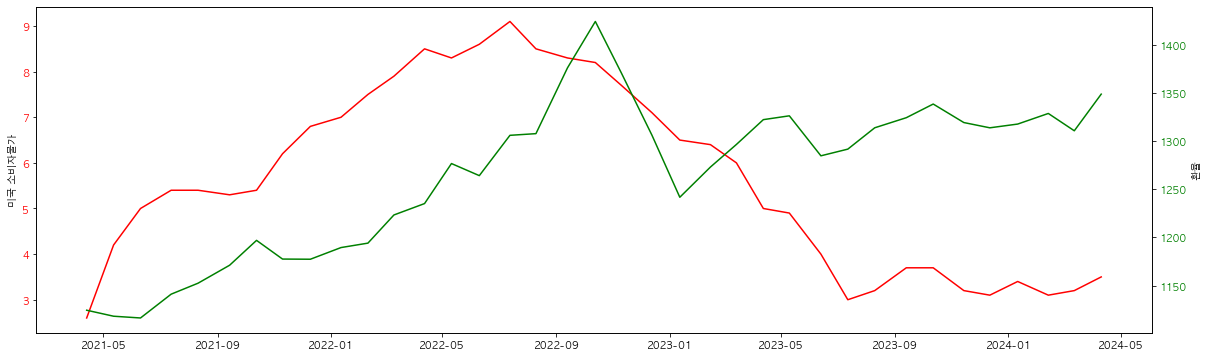

In [272]:
fig, ax = plt.subplots()
ax.plot(df_comp.실제, color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('미국 소비자물가')

ax2 = ax.twinx()

ax2.plot(df_comp.Close, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

In [273]:
df_comp.corr()

,실제,예측,이전,미소비자물가diff,Open,High,Low,Close,Adj Close,Volume
실제,1.000000,0.995381,0.962792,-0.039827,0.025755,0.038812,0.084125,0.026832,0.026832,NaN
예측,0.995381,1.000000,0.977206,0.056282,0.069423,0.080307,0.125349,0.070611,0.070611,NaN
이전,0.962792,0.977206,1.000000,0.157968,0.177127,0.184857,0.227484,0.178008,0.178008,NaN
미소비자물가diff,-0.039827,0.056282,0.157968,1.000000,0.454726,0.432223,0.429775,0.455889,0.455889,NaN
Open,0.025755,0.069423,0.177127,0.454726,1.000000,0.998054,0.980998,0.999982,0.999982,NaN
High,0.038812,0.080307,0.184857,0.432223,0.998054,1.000000,0.983086,0.998045,0.998045,NaN
Low,0.084125,0.125349,0.227484,0.429775,0.980998,0.983086,1.000000,0.981051,0.981051,NaN
Close,0.026832,0.070611,0.178008,0.455889,0.999982,0.998045,0.981051,1.000000,1.000000,NaN
Adj Close,0.026832,0.070611,0.178008,0.455889,0.999982,0.998045,0.981051,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 국채 10년물 가져오기

In [399]:
driver = get_driver('https://kr.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data')


el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.flex.flex-1.items-center.gap-3\.5.rounded.border.border-solid.border-\[\#CFD4DA\].bg-white.px-3\.5.py-2.shadow-select')
el.click()
el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.absolute.right-0.top-\[42px\].z-5.inline-flex.flex-col.items-end.gap-4.rounded.border.border-solid.bg-white.p-4.shadow-secondary > div.flex.items-start.gap-3 > div:nth-child(1) > input')
el.send_keys('04/09/2021')
el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.absolute.right-0.top-\[42px\].z-5.inline-flex.flex-col.items-end.gap-4.rounded.border.border-solid.bg-white.p-4.shadow-secondary > div.flex.cursor-pointer.items-center.gap-3.rounded.bg-v2-blue.py-2\.5.pl-4.pr-6.shadow-button.hover\:bg-\[\#116BCC\]')
el.click()
time.sleep(3)

content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find('table', 'freeze-column-w-1 w-full overflow-x-auto text-xs leading-4').find('tbody').find_all('tr')

list_dt, list_close, list_open, list_high, list_low = [], [], [], [], []
for idx in range(len(containers)):
    list_dt.append(containers[idx].find('time')['datetime'].replace(' ', ''))
    list_tmp = [ float(td.text)  for td in containers[idx].find_all('td', {'class':'min-w-[77px]'})  ]
    list_close.append(list_tmp[0])
    list_open.append(list_tmp[1])
    list_high.append(list_tmp[2])
    list_low.append(list_tmp[3])
    
df_bond10y = pd.DataFrame()
df_bond10y['Date'] = list_dt
df_bond10y['10y_close'] = list_close
df_bond10y['10y_open'] = list_open
df_bond10y['10y_high'] = list_high
df_bond10y['10y_low'] = list_low

df_bond10y.head(20)


,Date,10y_close,10y_open,10y_high,10y_low
0,2024-04-12,4.517,4.582,4.584,4.483
1,2024-04-11,4.584,4.548,4.593,4.513
2,2024-04-10,4.546,4.366,4.568,4.342
3,2024-04-09,4.362,4.426,4.432,4.354
4,2024-04-08,4.422,4.414,4.464,4.406
5,2024-04-05,4.400,4.309,4.406,4.305
6,2024-04-04,4.307,4.343,4.381,4.299
7,2024-04-03,4.351,4.357,4.429,4.343
8,2024-04-02,4.353,4.305,4.405,4.303
9,2024-04-01,4.317,4.190,4.337,4.188


#### 국채 1년물 가져오기

In [404]:
driver = get_driver('https://kr.investing.com/rates-bonds/u.s.-1-year-bond-yield-historical-data')


el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.flex.flex-1.items-center.gap-3\.5.rounded.border.border-solid.border-\[\#CFD4DA\].bg-white.px-3\.5.py-2.shadow-select')
el.click()
el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.absolute.right-0.top-\[42px\].z-5.inline-flex.flex-col.items-end.gap-4.rounded.border.border-solid.bg-white.p-4.shadow-secondary > div.flex.items-start.gap-3 > div:nth-child(1) > input')
el.send_keys('04/09/2021')
el = driver.find_element(By.CSS_SELECTOR, '#__next > div.desktop\:relative.desktop\:bg-background-default > div.relative.flex > div.grid.flex-1.grid-cols-1.px-4.pt-5.font-sans-v2.text-\[\#232526\].antialiased.xl\:container.sm\:px-6.md\:grid-cols-\[1fr_72px\].md\:gap-6.md\:px-7.md\:pt-10.md2\:grid-cols-\[1fr_420px\].md2\:gap-8.md2\:px-8.xl\:mx-auto > div.min-w-0 > div.mb-4.md\:mb-10 > div.sm\:flex.sm\:items-end.sm\:justify-between > div.relative.flex.items-center.md\:gap-6 > div.absolute.right-0.top-\[42px\].z-5.inline-flex.flex-col.items-end.gap-4.rounded.border.border-solid.bg-white.p-4.shadow-secondary > div.flex.cursor-pointer.items-center.gap-3.rounded.bg-v2-blue.py-2\.5.pl-4.pr-6.shadow-button.hover\:bg-\[\#116BCC\]')
el.click()
time.sleep(3)

content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find('table', 'freeze-column-w-1 w-full overflow-x-auto text-xs leading-4').find('tbody').find_all('tr')

list_dt, list_close, list_open, list_high, list_low = [], [], [], [], []
for idx in range(len(containers)):
    list_dt.append(containers[idx].find('time')['datetime'].replace(' ', ''))
    list_tmp = [ float(td.text)  for td in containers[idx].find_all('td', {'class':'min-w-[77px]'})  ]
    list_close.append(list_tmp[0])
    list_open.append(list_tmp[1])
    list_high.append(list_tmp[2])
    list_low.append(list_tmp[3])
    
df_bond1y = pd.DataFrame()
df_bond1y['Date'] = list_dt
df_bond1y['1y_close'] = list_close
df_bond1y['1y_open'] = list_open
df_bond1y['1y_high'] = list_high
df_bond1y['1y_low'] = list_low

df_bond1y.head(20)

,Date,1y_close,1y_open,1y_high,1y_low
0,2024-04-12,5.147,5.195,5.229,5.126
1,2024-04-11,5.179,5.223,5.291,5.168
2,2024-04-10,5.204,5.065,5.223,5.051
3,2024-04-09,5.046,5.145,5.150,5.044
4,2024-04-08,5.085,5.083,5.156,5.080
5,2024-04-05,5.061,5.041,5.083,5.020
6,2024-04-04,5.014,5.063,5.093,4.997
7,2024-04-03,5.047,5.075,5.107,5.041
8,2024-04-02,5.064,5.097,5.129,5.053
9,2024-04-01,5.078,5.037,5.097,5.024


### 미 정크본드 가산금리 가져오기

In [445]:
driver = get_driver('https://fred.stlouisfed.org/series/BAMLH0A1HYBB')

In [ ]:
<li><a class="dropdown-item fg-download-csv-chart-gtm fg-download-gtm" href="/graph/fredgraph.csv?bgcolor=%23e1e9f0&amp;chart_type=line&amp;drp=0&amp;fo=open%20sans&amp;graph_bgcolor=%23ffffff&amp;height=450&amp;mode=fred&amp;recession_bars=on&amp;txtcolor=%23444444&amp;ts=12&amp;tts=12&amp;width=1138&amp;nt=0&amp;thu=0&amp;trc=0&amp;show_legend=yes&amp;show_axis_titles=yes&amp;show_tooltip=yes&amp;id=BAMLH0A1HYBB&amp;scale=left&amp;cosd=2021-04-09&amp;coed=2024-04-11&amp;line_color=%234572a7&amp;link_values=false&amp;line_style=solid&amp;mark_type=none&amp;mw=3&amp;lw=2&amp;ost=-99999&amp;oet=99999&amp;mma=0&amp;fml=a&amp;fq=Daily%2C%20Close&amp;fam=avg&amp;fgst=lin&amp;fgsnd=2020-02-01&amp;line_index=1&amp;transformation=lin&amp;vintage_date=2024-04-13&amp;revision_date=2024-04-13&amp;nd=1996-12-31" id="download-data-csv"><i class="far fa-file-alt fg-download-csv-chart-gtm fg-download-gtm"></i> CSV<span> (data)</span></a></li><li>

In [459]:
el = driver.find_element(By.ID, 'input-cosd')
el.send_keys('2021-04-09')
el = driver.find_element(By.ID, 'download-button')
el.click()
#el = driver.find_element(By.XPATH, "//a[@id='download-data-csv']/")
                         
content = BeautifulSoup(driver.page_source, 'html.parser')

In [475]:
content.find('a', 'dropdown-item fg-download-csv-chart-gtm fg-download-gtm')['href']

'/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=BAMLH0A1HYBB&scale=left&cosd=2021-04-09&coed=2024-04-11&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily%2C%20Close&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-13&revision_date=2024-04-13&nd=1996-12-31'

In [479]:
import webbrowser
import requests

csv = requests.get('https://fred.stlouisfed.org' + content.find('a', 'dropdown-item fg-download-csv-chart-gtm fg-download-gtm')['href'])
open('BBrated.csv', 'wb').write(csv.content)

12698

#### 석유유가

In [534]:
driver = get_driver('https://www.opinet.co.kr/glopcoilSelect.do')

In [536]:
from selenium.webdriver.support.select import Select

select = Select(driver.find_element(By.NAME, 'STA_Y'))
select.select_by_value('2020')
select = Select(driver.find_element(By.NAME, 'STA_M'))
select.select_by_value('01')
select = Select(driver.find_element(By.NAME, 'STA_D'))
select.select_by_value('01')

el = driver.find_element(By.ID, 'qucik_toggle')
el.click()
el = driver.find_element(By.ID, 'glopcoilSelect')
actions = ActionChains(driver).move_to_element(el)
actions.perform()
el.click()


In [600]:
content = BeautifulSoup(driver.page_source, 'html.parser')
containers = content.find('table', 'tbl_type10').find('tbody').find_all('tr')

list_dt, list_dubai, list_brent, list_wti = [], [], [], []
for idx in range(len(containers)):
    dt = containers[idx].select('td')[0].text.replace('\t', '').replace('\n', '')
    dubai = containers[idx].select('td')[1].text.replace('\t', '').replace('\n', '')
    brent = containers[idx].select('td')[2].text.replace('\t', '').replace('\n', '')
    wti = containers[idx].select('td')[3].text.replace('\t', '').replace('\n', '')
    
    list_dt.append(''.join(['20', dt.replace('년','-').replace('월', '-').replace('일', '')]))
    list_dubai.append(float(dubai) if dubai != '-' else np.nan)
    list_brent.append(float(brent) if brent != '-' else np.nan)
    list_wti.append(float(wti) if wti != '-' else np.nan)
   
    
df_oil = pd.DataFrame()
df_oil['Date'] = list_dt
df_oil['dubai'] = list_dubai
df_oil['brent'] = list_brent
df_oil['wti'] = list_wti


df_oil.head()

,Date,dubai,brent,wti
0,2020-01-02,478.38,482.46,445.54
1,2020-01-03,493.29,499.19,458.80
2,2020-01-06,509.37,503.96,462.71
3,2020-01-07,502.75,502.24,461.26
4,2020-01-08,507.50,479.65,436.92


In [601]:
df_oil['Date'] = pd.to_datetime(df_oil['Date'])
df_oil.set_index('Date', inplace=True)

In [602]:
df_tmp = df_ex.join(df_oil)

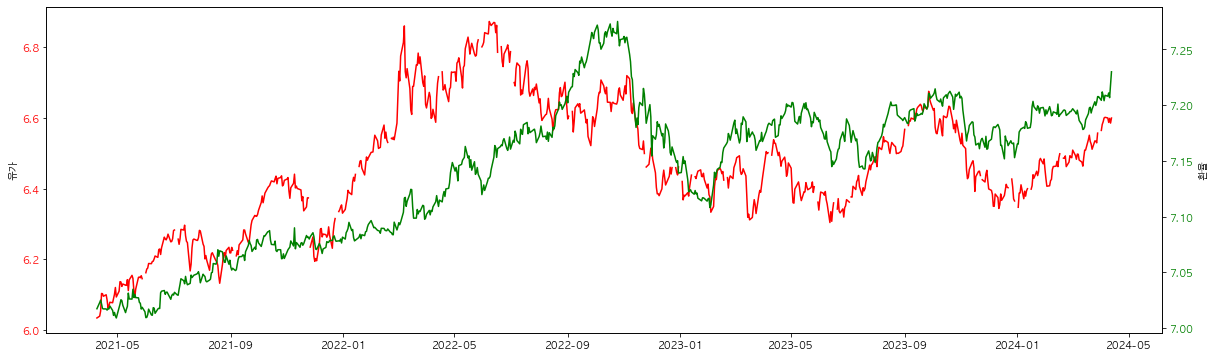

In [605]:
fig, ax = plt.subplots()
ax.plot(np.log(df_tmp.wti), color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('유가')

ax2 = ax.twinx()

ax2.plot(np.log(df_tmp.Close), color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel('환율')
plt.show()

In [606]:
df_tmp.corr()

,Open,High,Low,Close,Adj Close,Volume,dubai,brent,wti
Open,1.000000,0.998179,0.996883,0.999958,0.999958,NaN,0.649177,0.614774,0.554693
High,0.998179,1.000000,0.997143,0.998161,0.998161,NaN,0.649990,0.615734,0.555404
Low,0.996883,0.997143,1.000000,0.996863,0.996863,NaN,0.650806,0.615996,0.556956
Close,0.999958,0.998161,0.996863,1.000000,1.000000,NaN,0.649136,0.614681,0.554672
Adj Close,0.999958,0.998161,0.996863,1.000000,1.000000,NaN,0.649136,0.614681,0.554672
Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dubai,0.649177,0.649990,0.650806,0.649136,0.649136,NaN,1.000000,0.986311,0.977867
brent,0.614774,0.615734,0.615996,0.614681,0.614681,NaN,0.986311,1.000000,0.992210
wti,0.554693,0.555404,0.556956,0.554672,0.554672,NaN,0.977867,0.992210,1.000000
